<a href="https://colab.research.google.com/github/shebegyare131/shebegyare131/blob/main/Temperature%20literature_Using_FBprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import random
import seaborn as sns


In [4]:
#df=pd.read_csv('Tem.csv')
#df.head()

import pandas as pd


def remove_timezone_label(data):

    pos = data.index('+00:00')

    # Slice data to get rid of the tz, then strip leading/trailing whitespace
    data = (data[:pos]).strip()

    return data


if __name__ == '__main__':
    df=pd.read_csv("Tem.csv")

    # the apply() function is used to carry out a function on the data.
    df["created_at"] = df["created_at"].apply(remove_timezone_label)

    df.to_csv("Tem_NEW.csv", index=False)

KeyError: ignored

In [3]:
df.head()

NameError: ignored

In [ ]:
#df=df.drop(['Temperature'],axis=1)
df=df.drop(['PH'],axis=1)
df=df.drop(['Turbidity'],axis=1)
df=df.drop(['flow'],axis=1)
df=df.drop(['TDS'],axis=1)
df=df.drop(['Pressure'],axis=1)
df=df.drop(['Volume'],axis=1)
df=df.drop(['Color'],axis=1)
df=df.drop(['entry_id'],axis=1)
df.head(200)

,created_at,Temperature
0,2022-03-27T15:07:07,29.19
1,2022-03-27T15:07:34,29.19
2,2022-03-27T15:07:53,29.19
3,2022-03-27T15:08:24,29.12
4,2022-03-27T15:08:40,29.19
...,...,...
195,2022-03-27T17:06:30,29.12
196,2022-03-27T17:15:42,29.25
197,2022-03-27T17:16:01,29.25
198,2022-03-27T17:16:18,29.25


In [ ]:
#Load Data
df=pd.read_csv("HQQ.csv")
#url = 'https://api.foodsecurityportal.org/en/datastore/dump/1daac0af-9c6c-5b9f-b879-5dbb42f2d4b5'
#df = pd.read_csv(url)
df.head(10)

In [ ]:
#df = df.drop(['PH'], axis=1)
df = df.drop(['Oxygen Consumption'], axis=1)
df = df.drop(['Ammonia Nitrogen'], axis=1)
#df = df.drop(['commodity'], axis=1)
df = df.drop(['Dissolved Oxygen'], axis=1)
#df = df.drop(['source_name'], axis=1)
#df = df.drop(['source_url'], axis=1)
#df = df.drop(['minPrice'], axis=1)
#df = df.drop(['maxPrice'], axis=1)
#df = df.drop(['percentageChange'], axis=1)
#df = df.drop(['last_sync'], axis=1)
#df = df.drop(['Oxygen Consumption'], axis=1) 
#df = df.drop(['timestamp'], axis=1)


df.head()

In [ ]:
df.tail()

,created_at,Temperature
60164,2022-04-12T18:10:02,29.31
60165,2022-04-12T18:10:18,29.37
60166,2022-04-12T18:10:34,29.37
60167,2022-04-12T18:10:50,29.37
60168,2022-04-12T18:11:06,29.37


In [ ]:
df.isnull().sum()

created_at     0
Temperature    0
dtype: int64

In [ ]:
df.shape

(60169, 2)

In [ ]:
#conversion_rate = 85.33
#df['price'] = conversion_rate * df['price']
#df.head()

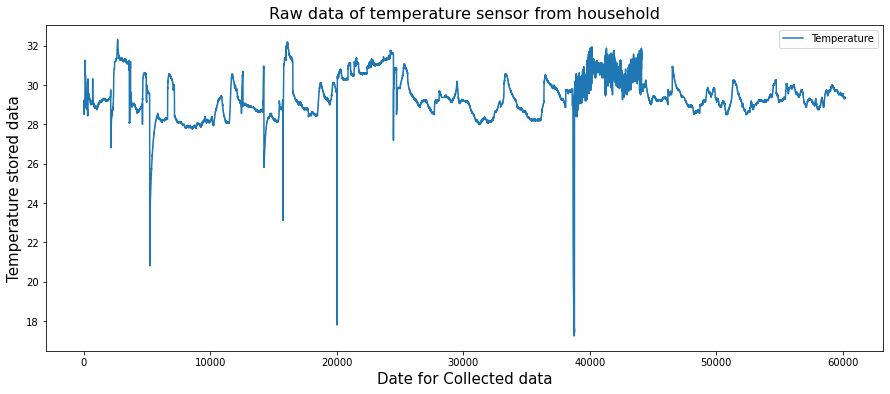

In [ ]:
df.plot(figsize=(15, 6))
plt.title("Raw data of temperature sensor from household", fontsize=16)
plt.ylabel("Temperature stored data", fontsize=15)
plt.xlabel("Date for Collected data", fontsize=15)
plt.show()

In [ ]:
df.columns = ['ds', 'y'] #required by fbprophet
df.head()

,ds,y
0,2022-03-27T15:07:07,29.19
1,2022-03-27T15:07:34,29.19
2,2022-03-27T15:07:53,29.19
3,2022-03-27T15:08:24,29.12
4,2022-03-27T15:08:40,29.19


In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2022-03-27 15:07:07,29.19
1,2022-03-27 15:07:34,29.19
2,2022-03-27 15:07:53,29.19
3,2022-03-27 15:08:24,29.12
4,2022-03-27 15:08:40,29.19


In [ ]:
df = df.sort_values(by='ds')
df

,ds,y
0,2022-03-27 15:07:07,29.19
1,2022-03-27 15:07:34,29.19
2,2022-03-27 15:07:53,29.19
3,2022-03-27 15:08:24,29.12
4,2022-03-27 15:08:40,29.19
...,...,...
60164,2022-04-12 18:10:02,29.31
60165,2022-04-12 18:10:18,29.37
60166,2022-04-12 18:10:34,29.37
60167,2022-04-12 18:10:50,29.37


In [ ]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [ ]:
model = Prophet()

In [ ]:
df.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
model.component_modes

{'additive': ['weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
df.tail()

,ds,y
60164,2022-04-12 18:10:02,29.31
60165,2022-04-12 18:10:18,29.37
60166,2022-04-12 18:10:34,29.37
60167,2022-04-12 18:10:50,29.37
60168,2022-04-12 18:11:06,29.37


In [ ]:
future_dates = model.make_future_dataframe(periods=365)

In [ ]:
future_dates.tail()

,ds
60529,2023-04-08 18:11:06
60530,2023-04-09 18:11:06
60531,2023-04-10 18:11:06
60532,2023-04-11 18:11:06
60533,2023-04-12 18:11:06


In [ ]:
pred = model.predict(future_dates)
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-27 15:07:07,27.732741,28.091719,29.875355,27.732741,27.732741,1.258481,1.258481,1.258481,0.769705,0.769705,0.769705,0.488776,0.488776,0.488776,0.0,0.0,0.0,28.991222
1,2022-03-27 15:07:34,27.734079,28.088857,29.885403,27.734079,27.734079,1.258212,1.258212,1.258212,0.769779,0.769779,0.769779,0.488433,0.488433,0.488433,0.0,0.0,0.0,28.992291
2,2022-03-27 15:07:53,27.735021,28.043127,29.905037,27.735021,27.735021,1.258018,1.258018,1.258018,0.769826,0.769826,0.769826,0.488192,0.488192,0.488192,0.0,0.0,0.0,28.993038
3,2022-03-27 15:08:24,27.736557,28.039597,29.844764,27.736557,27.736557,1.257693,1.257693,1.257693,0.769895,0.769895,0.769895,0.487798,0.487798,0.487798,0.0,0.0,0.0,28.994250
4,2022-03-27 15:08:40,27.737350,28.115441,29.918350,27.737350,27.737350,1.257521,1.257521,1.257521,0.769926,0.769926,0.769926,0.487595,0.487595,0.487595,0.0,0.0,0.0,28.994871


In [ ]:
#pred = pred[['ds', 'yhat']]
#pred

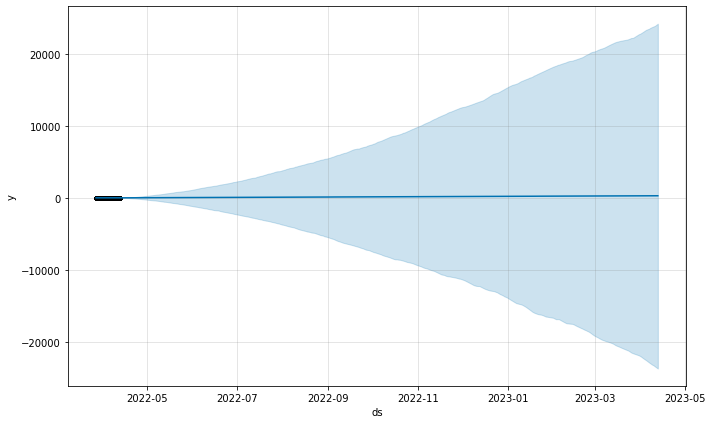

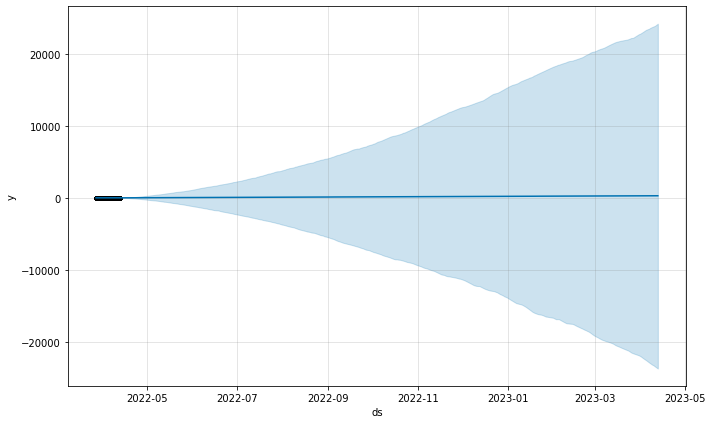

In [ ]:
model.plot(pred)

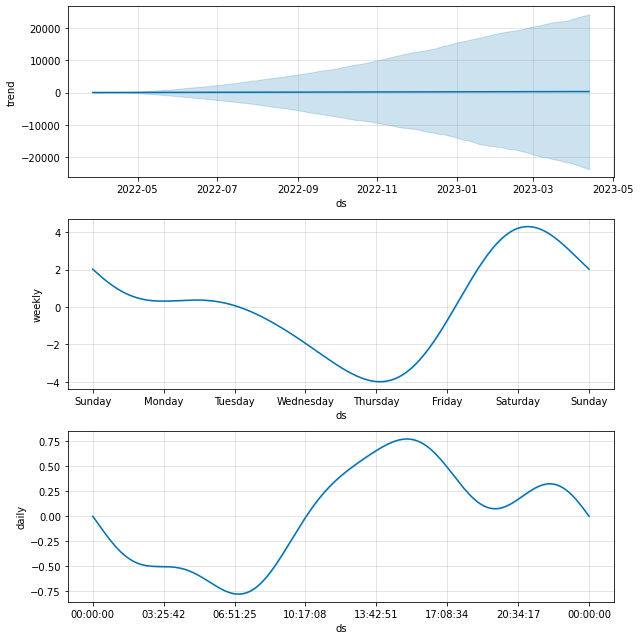

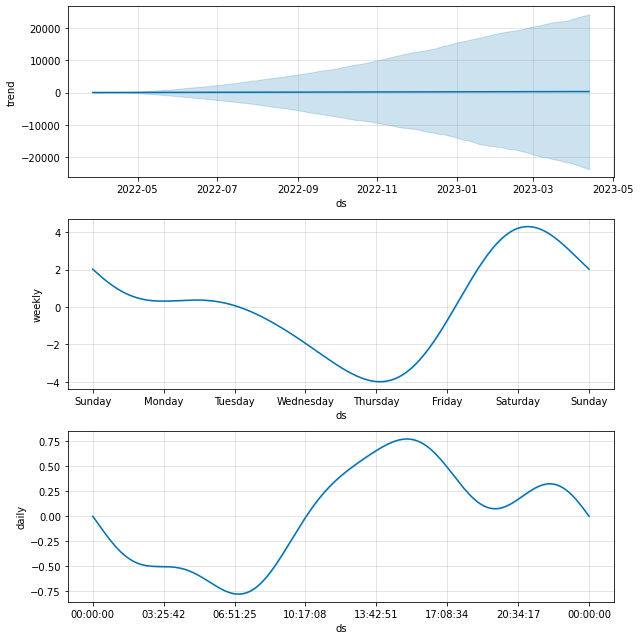

In [ ]:
model.plot_components(pred)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='9 days', period='6 days', horizon='3 days')
#df_cv = cross_validation(model, initial='365 days', period='90 days', horizon='180 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2022-04-09 18:11:06 and 2022-04-09 18:11:06


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-04-09 21:35:48,30.862144,29.555766,32.116077,30.94,2022-04-09 18:11:06
1,2022-04-09 21:36:04,30.862880,29.562478,32.057300,30.94,2022-04-09 18:11:06
2,2022-04-09 21:36:20,30.863613,29.691126,32.184462,30.94,2022-04-09 18:11:06
3,2022-04-09 21:36:38,30.864436,29.578651,32.253778,30.94,2022-04-09 18:11:06
4,2022-04-09 21:36:54,30.865165,29.596900,32.181459,30.94,2022-04-09 18:11:06


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,0 days 09:52:40,2.174138,1.474496,1.345905,0.045804,0.044987,0.869597
1,0 days 09:52:56,2.178562,1.475995,1.347649,0.045865,0.044987,0.868864
2,0 days 09:53:12,2.182988,1.477494,1.349394,0.045925,0.044987,0.868132
3,0 days 09:53:28,2.187417,1.478992,1.351140,0.045986,0.044988,0.868132
4,0 days 09:53:43,2.191848,1.480489,1.352888,0.046047,0.044988,0.867399


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


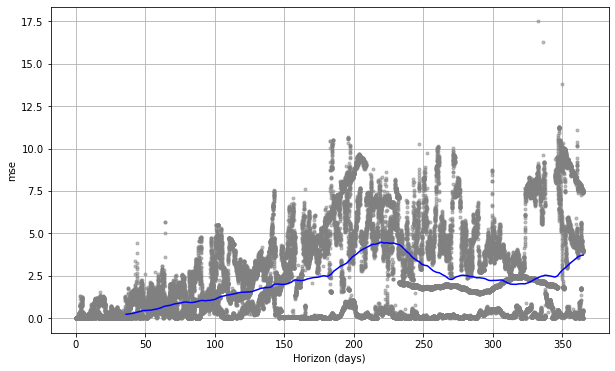

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mse')

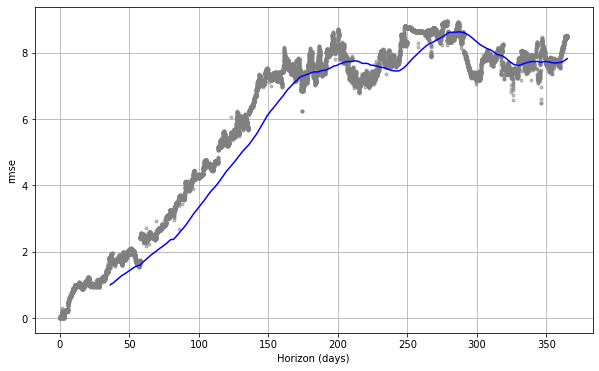

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

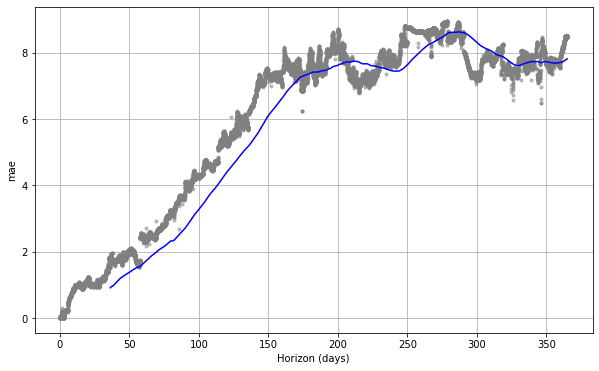

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

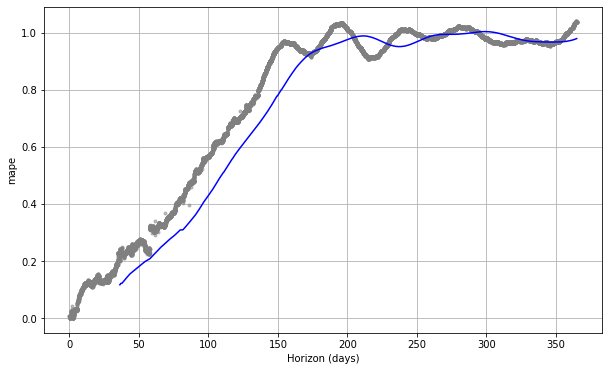

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

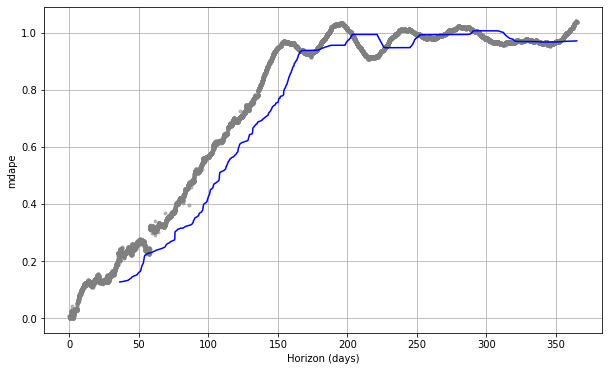

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mdape')